# Quandl - API Demo

Quandl uses a very straightforward API to make its free and premium data available. Currently, 50 anonymous calls are allowed, then a (free) API key is required. See [documentation](https://www.quandl.com/tools/api) for more details.

In [1]:
%matplotlib inline
import os
import quandl

import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
sns.set_style('whitegrid')

In [10]:
api_key = os.environ['QUANDL_API_KEY']
# oil = quandl.get('EIA/PET_RWTC_D', api_key=api_key).squeeze()
# tsla = quandl.get('WIKI/TSLA', api_key=api_key).squeeze()
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT', 'TSLA','GOOG'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close','volume','ex-dividend','split_ratio','adj_volume'] }, 
                        date = { 'gte': '2012-12-31', 'lte': '2023-02-11' }, 
                        paginate=True)


In [14]:
data.groupby(['ticker']).max()

,date,adj_close,volume,ex-dividend,split_ratio,adj_volume
ticker,,,,,,
AAPL,2018-03-27,181.72,189560600.0,3.29,7.0,365213100.0
GOOG,2018-03-27,1175.84,11164943.0,0.00,1.0,11164943.0
MSFT,2018-03-27,96.77,248428500.0,0.42,1.0,248428500.0
TSLA,2018-03-27,385.00,37163900.0,0.00,1.0,37163900.0
WMT,2018-03-27,109.55,80811495.0,0.51,1.0,80811495.0


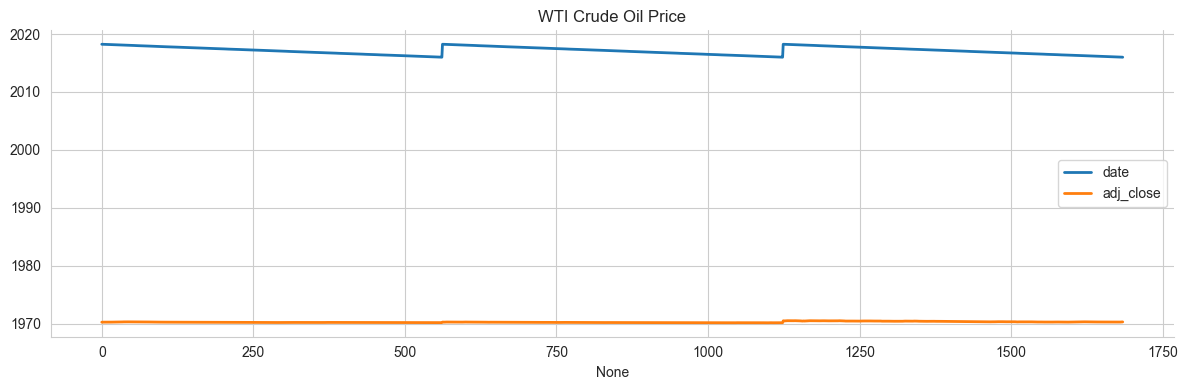

In [7]:
data.plot(lw=2, title='WTI Crude Oil Price', figsize=(12, 4))
sns.despine()
plt.tight_layout();